In [66]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = 15, 5


In [67]:
data = pd.read_csv('fedfund.csv', squeeze=True, index_col=[0], parse_dates=True)

print (data.head(15))


DATE
1954-07-01    0.80
1954-08-01    1.22
1954-09-01    1.06
1954-10-01    0.85
1954-11-01    0.83
1954-12-01    1.28
1955-01-01    1.39
1955-02-01    1.29
1955-03-01    1.35
1955-04-01    1.43
1955-05-01    1.43
1955-06-01    1.64
1955-07-01    1.68
1955-08-01    1.96
1955-09-01    2.18
Name: FEDFUNDS, dtype: float64


# Taking a Closer Look at the Federal Funds Rate



### Data



Using data from the Federal Reserve of Economic Data(FRED) we will be taking a closer look at the federal funds rate.

Some of interesting things that we can look at are the key economic events of the past such as the stagflation and inflation of the 1970s and 1980s,the housing bubble that lead into the Great Recession, and finally we'll make a forecast of the federal fund rate. When looking at the inflation and recession events of the 1970s-80s and the 2000s we'll see what measures where taken to help turn around the economy by specifivally looking at the federal fund rate.

Things to watch out for are the different beliefs the chairmen of the Federal Reserve System have. There have been 7 different chairmen since 1960 with the 8th being elected in February 2018. Chairmen will have different reactions to economic turbulence and different ideas on how to fix the economy. Also keep in mind the stock market and how well it is performing in comparison to our to key economic events.

### Analytical Questions

Now that we have are data, let's dive in to see what kind what kind of changes where made during these times of economic turbulence. First we will start by looking at the 1970s and 1980s. Finally we will look at our most recent crash in the mid 2000s and then make a forecast on our data.

#### Visual of the Federal Fund Rate

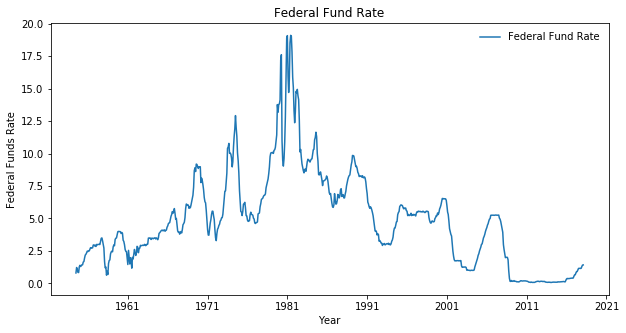

In [68]:
# Labelling Graph, making legend

fig, ax1 = plt.subplots()
plt.title('Federal Fund Rate')
ax1.plot(data, label='Federal Fund Rate')
ax1.set_xlabel('Year')
ax1.legend(loc = 0, frameon= False)

# Make the y-axis label, ticks and tick labels match the line color.
# Also adding legend

ax1.set_ylabel('Federal Funds Rate')
ax1.tick_params('y', colors='black')
fig.set_size_inches(10,5)









Taking a look at this graph we can see there has been lots of changes to the Federal Fund Rate. It's pretty hard to see anything specific in this graph so let's take a closer look at our key economic events.

## How did the events of the 1970s affect the Federal Fund Rate?
        

Taking a look at our first graph it's pretty obvious that the rate increased tremedously in a span of 10 years, but it wasn't a matter of bigger is better when it came to adjusted the rate.

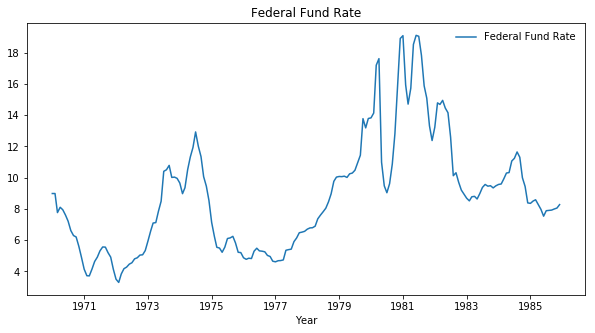

In [69]:
data1 = data['1970-01-01' : '1985-12-01']

fig, ax1 = plt.subplots()
plt.title('Federal Fund Rate')
ax1.plot(data1, label='Federal Fund Rate')
ax1.set_xlabel('Year')
ax1.legend(loc = 0, frameon= False)
data1.describe(percentiles= [.25, .5, .75, .95])
fig.set_size_inches(10,5)

Taking a cutout of 1970-1979 we can get a much better idea of what was going on in the 1970s. In 1973 inflation tripled in the USA as external issues such as the OPEC embargo and internal issues caused by the presidential administration at the time fueled the fire for disaster. Arthur Burns, the chair at the time doubled the federal fund rate. He began what became known as stop-go economic policy, where interest rates would increase to fight inflation and then drop drastically to try and stimulate the economy, this continued into the 1980s. Let's see how extreme some the interest rates where compared to our data set.

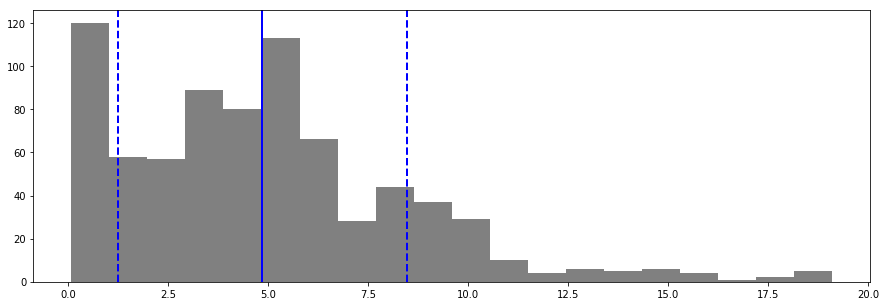

In [70]:
plt.hist(data, bins=20, color='gray')

# plot mean 
plt.axvline(data.mean(), color='b', linestyle='solid', linewidth=2)

# plot std both ways
plt.axvline(data.mean() + data.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(data.mean() - data.std(), color='b', linestyle='dashed', linewidth=2)
plt.show()

In [71]:
sum(data1 > 10)

61

We can see that we have 61 data points that are greater than a 10% percent interest rate which well above the 1 standard deviation, but I think we can narrow in even further.

10

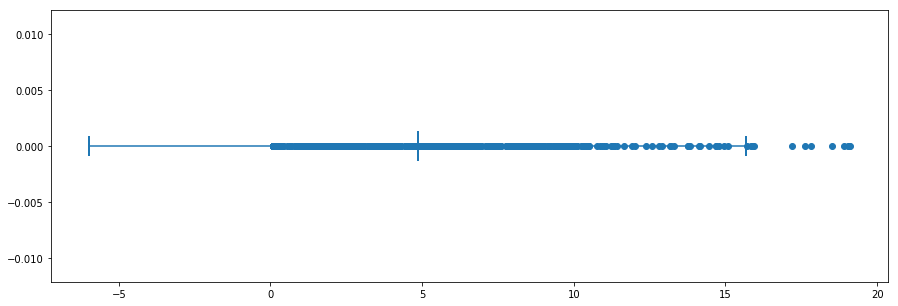

In [72]:
plt.scatter(data,np.zeros(data.shape[0]))
std=np.std(data)
plt.errorbar(np.mean(data),0,xerr=3*std,fmt='|', ms=30,mew=2,capthick=2,capsize=10)
sum(data1 > 15.85)


        

Looking at the graph above we can see that not only are there severe outliers outside the 2nd deviation but that all of them are from the specific time frame that we are looking at(1970-1985). This shows us how little we knew about how to use macroeconomic policy and more specifically the monetary policy to help us get out of economic downturns. In order to combat high inflation the FED increased the interest rate tremedously. This helped because raising the interest rate makes it more expensive to lend, fixing the inflation which results from "too much money for too few goods". 

Next we will look at the 2000s and see another case of never before seen interest rates. 

## How did the Federal Fund Rate change during the economic recession of the 2000s?

It became clear in September 2007 that a bubble in the U.S. housing market was bursting, the Federal Reserve began cutting interest rates in an effort to cushion what many realized would be a very big blow to the economy. Business slowed to a halt, which lead to businesses cutting costs so they can keep the doors open. Let's take a look at our time period and how differently the FED reacted to recession in comparison to inflation.

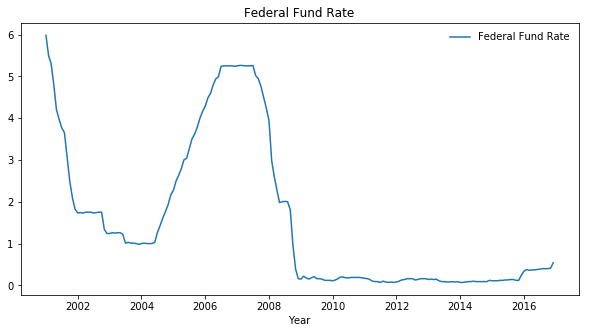

In [93]:
data2 = data['2001-01-01' : '2016-12-01']

fig, ax1 = plt.subplots()
plt.title('Federal Fund Rate')
ax1.plot(data2, label='Federal Fund Rate')
ax1.set_xlabel('Year')
ax1.legend(loc = 0, frameon= False)
data1.describe(percentiles= [.25, .5, .75, .95])
fig.set_size_inches(10,5)

We can see that leading into the crash of 2007 that interest rates where actually increasing. Some economists argue that the Fed should have moved more aggressively and that its slow and predictable increases helped to bolster the housing bubble. Let's see how the fed responded in comparison to the 1970s and 1980s.

In [94]:
data1.describe()



count    192.000000
mean       8.777448
std        3.613589
min        3.290000
25%        5.550000
50%        8.495000
75%       10.312500
max       19.100000
Name: FEDFUNDS, dtype: float64

In [95]:
data2.describe()

count    192.000000
mean       1.528490
std        1.793943
min        0.070000
25%        0.140000
50%        0.405000
75%        2.332500
max        5.980000
Name: FEDFUNDS, dtype: float64

We can see that there is a huge difference in average rate in both 15 year samples. From 1970 to 1985 the average was 8.7%, which would higher than the max interest rate during 2001-2016. Another thing we can get from these statistics is the change in responsibility from the FED. See after the crazy inflation in the 1970s the US wanted to keep inflation in check. In fact they lowered inflation so much that it may have hindered the recovery from the recession. Today the Federal Reserve's primary goal is to keep inflation low and unemployment rates low as well.

Let's move on and see if we can do some forecasting on the funding rate.



## What's going to happen to the Federal Fund Rate in the future?

We have seen that the federal fund rate is very reactive to what is going on in the economy. We're going to make a simple forecast that doesn't include any external factors and see what it gives us. Let's first check are data for stationarity. 

In [96]:
# Making sure we are working with datetime

data.index 

DatetimeIndex(['1954-07-01', '1954-08-01', '1954-09-01', '1954-10-01',
               '1954-11-01', '1954-12-01', '1955-01-01', '1955-02-01',
               '1955-03-01', '1955-04-01',
               ...
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01'],
              dtype='datetime64[ns]', name='DATE', length=764, freq=None)

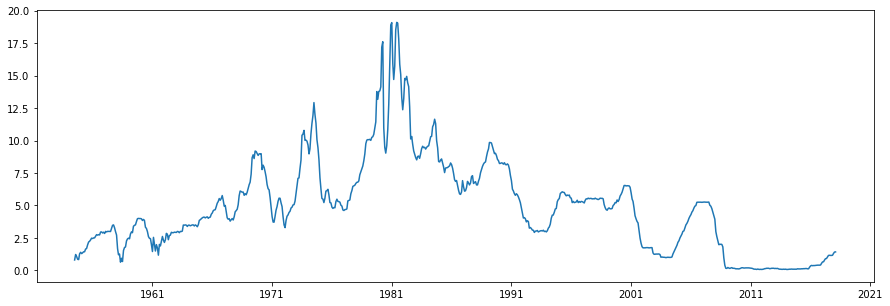

In [97]:
plt.plot(data)

The most simple way to check for stationarity is to plot the whole dataset. It's really hard to tell just from looking at it some let's run some tests for stationarity.

In [98]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = data.rolling(window=12,center=False).mean()
    rolstd = data.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
   
  
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

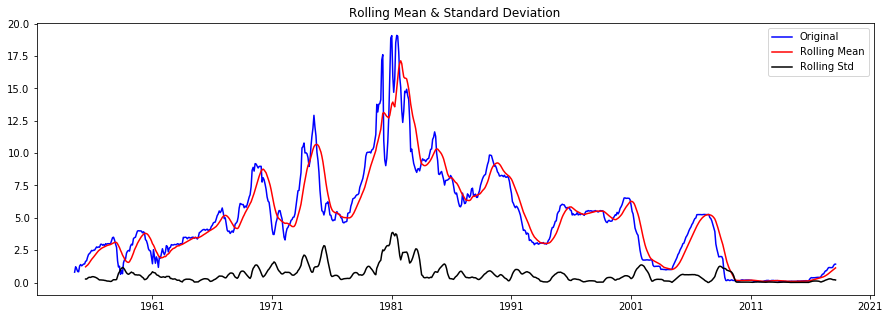

Results of Dickey-Fuller Test:
Test Statistic                  -2.734984
p-value                          0.068178
#Lags Used                      17.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


In [99]:
test_stationarity(data)

For the test, if our test statistic is less than the critical value we can reject the null hypothesis which would be that the data is non-stationary. For this test it looks like we can only say with 90% confidence that the series is stationary. Let's see if we can improve that by taking a log transfomation of our data.  

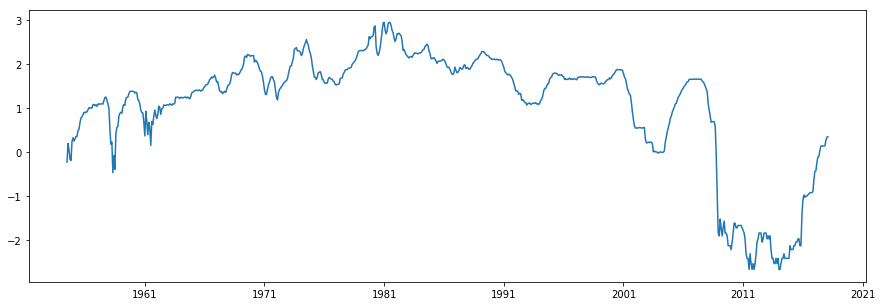

In [100]:
data_log = np.log(data)

plt.plot(data_log)

Now let's get the moving average and then take that and subtract it from the original series. 

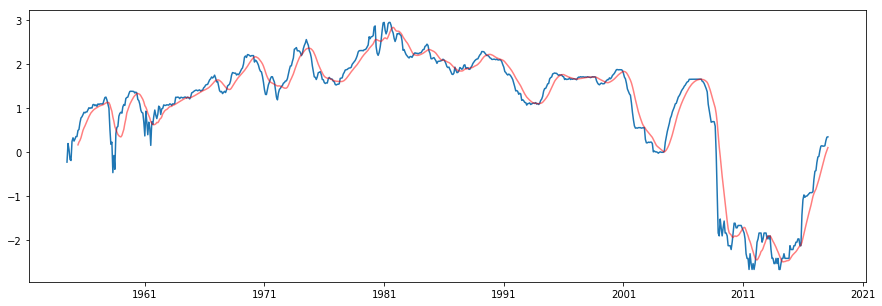

In [101]:
moving_avg = data_log.rolling(window=12,center=False).mean()
plt.plot(data_log)
plt.plot(moving_avg, color='red', alpha=.5)

In [102]:
data_log_moving_avg_diff = data_log - moving_avg
data_log_moving_avg_diff.head(12)

DATE
1954-07-01         NaN
1954-08-01         NaN
1954-09-01         NaN
1954-10-01         NaN
1954-11-01         NaN
1954-12-01         NaN
1955-01-01         NaN
1955-02-01         NaN
1955-03-01         NaN
1955-04-01         NaN
1955-05-01         NaN
1955-06-01    0.325856
Name: FEDFUNDS, dtype: float64

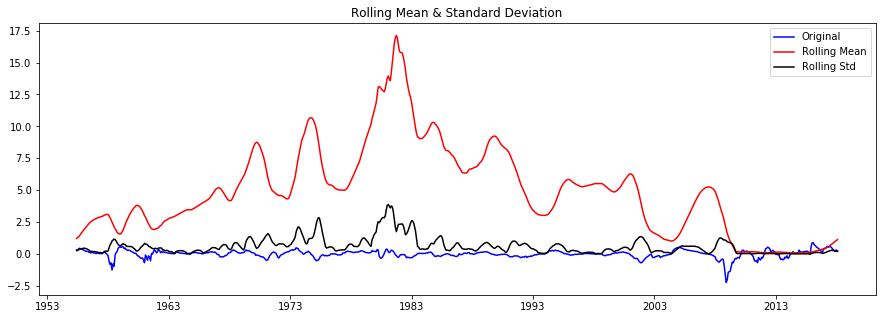

Results of Dickey-Fuller Test:
Test Statistic                -7.272827e+00
p-value                        1.572091e-10
#Lags Used                     3.000000e+00
Number of Observations Used    7.490000e+02
Critical Value (1%)           -3.439111e+00
Critical Value (5%)           -2.865407e+00
Critical Value (10%)          -2.568829e+00
dtype: float64


In [103]:
data_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(data_log_moving_avg_diff)

Perfect, we now can say with 99% confidence that we have a stationary series. Let's move on to the next step and do some forecasting.

In [104]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

In [105]:
lag_acf = acf(data_log, nlags=200)
lag_pacf = pacf(data_log, nlags=20, method='ols')

Next we will plot ACF and PACF to see where they cross into the confidence interval we are looking for indicated by the dotted line.

Text(0.5,1,'Autocorrelation Function')

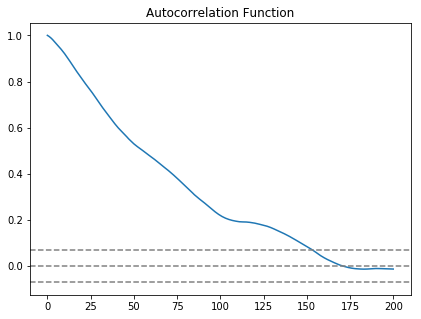

In [106]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

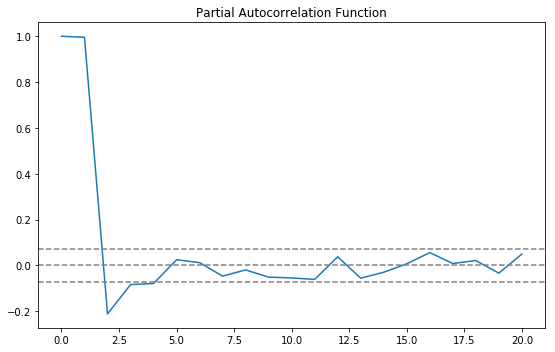

In [107]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\greg\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\greg\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:             D.FEDFUNDS   No. Observations:                  763
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 568.604
Method:                       css-mle   S.D. of innovations              0.115
Date:                Wed, 18 Apr 2018   AIC                          -1123.208
Time:                        16:24:19   BIC                          -1090.747
Sample:                    08-01-1954   HQIC                         -1110.710
                         - 02-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0010      0.006      0.161      0.872      -0.011       0.013
ar.L1.D.FEDFUNDS     0.1893      0.037      5.172      0.000       0.118       0.261
ar.L2.D.FEDFUNDS     0.0710 

c:\users\greg\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


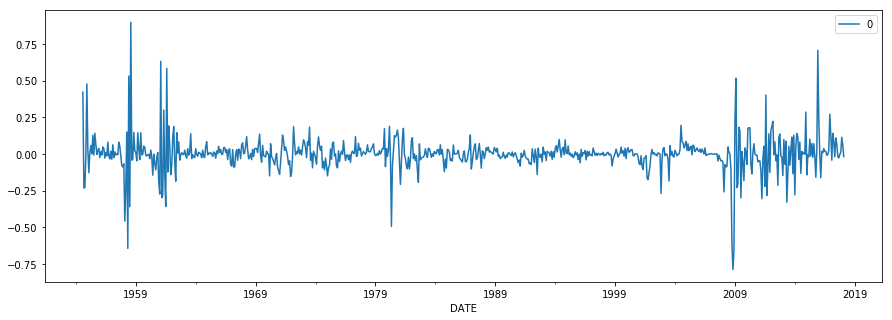

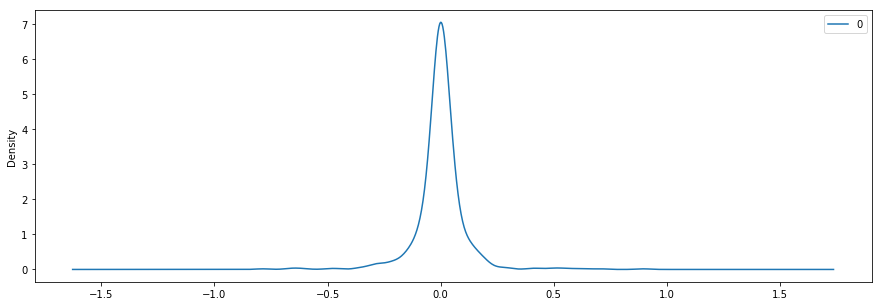

                0
count  763.000000
mean    -0.000140
std      0.114981
min     -0.785935
25%     -0.027697
50%     -0.000272
75%      0.031230
max      0.896132


In [108]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from sklearn.metrics import mean_squared_error

model = ARIMA(data_log, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

c:\users\greg\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
c:\users\greg\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
c:\users\greg\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtyp

predicted=5.281455, expected=5.400000
predicted=5.465563, expected=5.220000
predicted=5.129217, expected=5.300000
predicted=5.368946, expected=5.240000
predicted=5.195762, expected=5.310000
predicted=5.373185, expected=5.290000
predicted=5.271829, expected=5.250000
predicted=5.249179, expected=5.190000
predicted=5.172861, expected=5.390000
predicted=5.493027, expected=5.510000
predicted=5.539127, expected=5.500000
predicted=5.490593, expected=5.560000
predicted=5.577167, expected=5.520000
predicted=5.487656, expected=5.540000
predicted=5.562939, expected=5.540000
predicted=5.538983, expected=5.500000
predicted=5.494281, expected=5.520000
predicted=5.541540, expected=5.500000
predicted=5.495798, expected=5.560000
predicted=5.600401, expected=5.510000
predicted=5.485336, expected=5.490000
predicted=5.499583, expected=5.450000
predicted=5.438613, expected=5.490000
predicted=5.525290, expected=5.560000
predicted=5.593019, expected=5.540000
predicted=5.531930, expected=5.550000
predicted=5.

predicted=0.102992, expected=0.090000
predicted=0.082604, expected=0.090000
predicted=0.091127, expected=0.090000
predicted=0.088397, expected=0.090000
predicted=0.090324, expected=0.090000
predicted=0.089391, expected=0.120000
predicted=0.132495, expected=0.110000
predicted=0.100346, expected=0.110000
predicted=0.111370, expected=0.110000
predicted=0.106635, expected=0.120000
predicted=0.124753, expected=0.120000
predicted=0.117849, expected=0.130000
predicted=0.133929, expected=0.130000
predicted=0.126987, expected=0.140000
predicted=0.143961, expected=0.140000
predicted=0.137000, expected=0.120000
predicted=0.110891, expected=0.120000
predicted=0.121718, expected=0.240000
predicted=0.291570, expected=0.340000
predicted=0.366029, expected=0.380000
predicted=0.382722, expected=0.360000
predicted=0.335150, expected=0.370000
predicted=0.369014, expected=0.370000
predicted=0.364537, expected=0.380000
predicted=0.386075, expected=0.390000
predicted=0.391585, expected=0.400000
predicted=0.

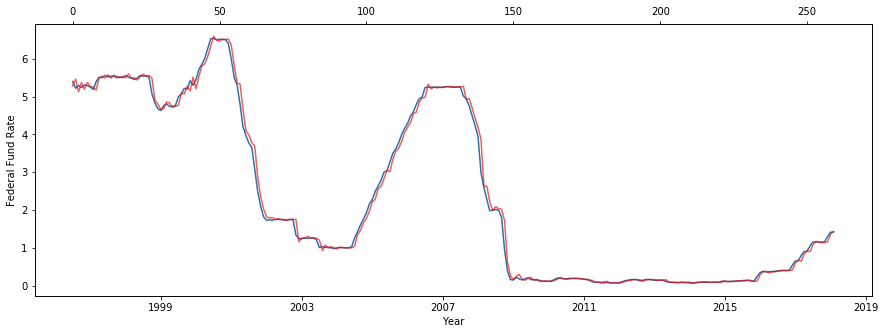

In [92]:
size = int(len(data)*0.66)
train, test = data[0:size], data[size:len(data)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# the plot
fig, ax1 = plt.subplots()
ax1.plot(test)
ax1.set_xlabel('Year')

ax1.set_ylabel('Federal Fund Rate', color='black')
ax1.tick_params('y', colors='black')

ax2 = ax1.twiny()
ax2.plot(predictions, color='red', alpha=.65)
ax2.set_ylabel('Year', color='black')
ax2.tick_params('y', colors='black', top=False)
plt.show()

Well now we have a pretty ARIMA model of our data. We have a really low MSE which is what we were aiming for. So what's next? Well let's get the monkey off our back and explain why we can't really forecast anything with just the federal fund rate. See the federal fund rate changes based on the domestic and foreign economy. In order for us to be able to predict what the federal fund rate is going to do we need more variables. Things like the GDP, Real GDP, GNP, unemployment rate, and inflation rate need to be considered. We have a great model but can't really do anything with it. 

## Conclusion

   Thus far we have taken a look at two 15 year periods where the federal fund rate experienced big changes. We saw that the FED took drastic measures to help turn around the economy in the US by looking at those 15 year blocks and comparing them to the overall trend. Lastly we tried to make an ARIMA model that would forecast the federal funds rate. Not only was this a very accurate forecast but at the same time had some flaws because of the context of how the fund rate moves.
   Improving our model is pretty simple, we need more variables and more data. Now this is easier said than done but it is absolutely necessary in order for this model to be useful. With more variables one would be able to predict the future state of the economy in the US 5, 10, or even further down the road. Making an accurate model would be difficult and right the best measure of how the economy is going to perform would be looking at bond yield curves which I won't go into detail but [here is a link](https://www.investopedia.com/articles/basics/06/invertedyieldcurve.asp) if you want to now more about it's predictive power. 
    
    


## Bibliography

Board of Governors of the Federal Reserve System (US), Effective Federal Funds Rate [FEDFUNDS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/FEDFUNDS, April 16, 2018.